The Titanic was a British ocean liner that struck an iceberg and sunk on its maiden voyage in 1912 from the United Kingdom to New York. More than 1,500 of the estimated 2,224 passengers and crew died in the accident, making this one of the largest maritime disasters ever outside of war. The ship carried a wide range of passengers of all ages and both genders, from luxury travelers in first-class to immigrants in the lower classes. However, not all passengers were equally likely to survive the accident. You will use real data about a selection of 891 passengers to predict which passengers survived.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

%matplotlib inline
random.seed(42)
np.random.seed(42)

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)
np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("titanicclean.csv")

In [3]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,0,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,0,3,35.00,8.05,0,0,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Sex         889 non-null    int64  
 2   Pclass      889 non-null    int64  
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   SibSp       889 non-null    int64  
 6   Parch       889 non-null    int64  
 7   FamilySize  889 non-null    int64  
 8   Embarked    889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [5]:
df.shape

(889, 9)

### Question 1: Training and test sets 

Split titanic_clean into test and training sets - after running the setup code, it should have 891 rows and 9 variables.

Set the seed to 42, then use the caret package to create a 20% data partition based on the Survived column. Assign the 20% partition to test_set and the remaining 80% partition to train_set.

In [6]:
X = df.iloc[:,1:]

In [7]:
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

How many observations are in the training set?

In [9]:
X_train.shape

(711, 8)

How many observations are in the test set?

In [10]:
X_test.shape

(178, 8)

What proportion of individuals in the training set survived?

In [11]:
y_train.value_counts()

0    440
1    271
Name: Survived, dtype: int64

In [12]:
268/712 * 100

37.640449438202246

### Question 2: Baseline prediction by guessing the outcome 

The simplest prediction method is randomly guessing the outcome without using additional predictors. These methods will help us determine whether our machine learning algorithm performs better than chance. How accurate are two methods of guessing Titanic passenger survival?

Set the seed to 3. For each individual in the test set, randomly guess whether that person survived or not by sampling from the vector c(0,1) (Note: use the default argument setting of prob from the sample function).

In [13]:
y_test

280    0
434    1
39     1
417    0
584    1
      ..
432    0
806    0
25     1
84     1
10     1
Name: Survived, Length: 178, dtype: int64

In [14]:
y_test.sample(frac=0.5,random_state=3)

396    0
235    0
359    0
651    0
411    1
      ..
141    1
82     0
744    0
266    1
536    1
Name: Survived, Length: 89, dtype: int64

In [15]:
y_test.sample(frac=0.5,random_state=3).value_counts()

0    57
1    32
Name: Survived, dtype: int64

In [16]:
42/(48+42) * 100

46.666666666666664

### Question 3a: Predicting survival by sex 

Use the training set to determine whether members of a given sex were more likely to survive or die. Apply this insight to generate survival predictions on the test set.

In [17]:
X_train

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
707,1,1,22.00,151.55,0,0,1,2
239,1,3,28.00,14.45,1,0,2,0
381,0,3,32.00,7.92,0,0,1,2
791,1,3,28.00,69.55,8,2,11,2
682,0,3,14.00,46.90,5,2,8,2
...,...,...,...,...,...,...,...,...
106,0,3,28.00,7.78,0,0,1,2
270,0,3,25.00,0.00,0,0,1,2
860,1,1,48.00,25.93,0,0,1,2
435,1,3,21.00,34.38,2,2,5,2


In [18]:
y_train

707    1
239    0
381    0
791    0
682    0
      ..
106    1
270    1
860    1
435    0
102    0
Name: Survived, Length: 711, dtype: int64

In [19]:
trainingset = pd.concat([X_train,y_train],axis=1)

In [20]:
trainingset

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
707,1,1,22.00,151.55,0,0,1,2,1
239,1,3,28.00,14.45,1,0,2,0,0
381,0,3,32.00,7.92,0,0,1,2,0
791,1,3,28.00,69.55,8,2,11,2,0
682,0,3,14.00,46.90,5,2,8,2,0
...,...,...,...,...,...,...,...,...,...
106,0,3,28.00,7.78,0,0,1,2,1
270,0,3,25.00,0.00,0,0,1,2,1
860,1,1,48.00,25.93,0,0,1,2,1
435,1,3,21.00,34.38,2,2,5,2,0


In [21]:
survived = trainingset[trainingset["Survived"] == 1]
survived

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
707,1,1,22.00,151.55,0,0,1,2,1
55,0,1,28.00,35.50,0,0,1,2,1
300,0,3,28.00,23.25,2,0,3,1,1
81,1,3,28.00,7.79,0,0,1,1,1
779,1,3,13.00,7.23,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
614,1,2,24.00,65.00,1,2,4,2,1
700,0,1,35.00,26.29,0,0,1,2,1
106,0,3,28.00,7.78,0,0,1,2,1
270,0,3,25.00,0.00,0,0,1,2,1


In [22]:
survived.groupby("Sex").count()

,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
Sex,,,,,,,,
0,93,93,93,93,93,93,93,93
1,178,178,178,178,178,178,178,178


What proportion of training set females survived?

In [23]:
181/(181+87)

0.6753731343283582

What proportion of training set males survived?

In [24]:
87/(181+87)

0.3246268656716418

### Question 3b: Predicting survival by sex 

Predict survival using sex on the test set: if the survival rate for a sex is over 0.5, predict survival for all individuals of that sex, and predict death if the survival rate for a sex is under 0.5.

What is the accuracy of this sex-based prediction method on the test set?

In [25]:
X_test

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
280,0,3,28.00,7.85,0,0,1,2
434,1,1,14.00,120.00,1,2,4,2
39,1,3,14.00,11.24,1,0,2,0
417,0,2,30.00,13.00,0,0,1,2
584,1,1,18.00,79.65,0,2,3,2
...,...,...,...,...,...,...,...,...
432,0,3,17.00,7.12,0,0,1,2
806,1,3,18.00,7.78,0,0,1,2
25,1,3,38.00,31.39,1,5,7,2
84,1,3,33.00,15.85,3,0,4,2


In [26]:
y_test

280    0
434    1
39     1
417    0
584    1
      ..
432    0
806    0
25     1
84     1
10     1
Name: Survived, Length: 178, dtype: int64

In [27]:
testset = pd.concat([X_test,y_test],axis=1)

In [28]:
testset

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
280,0,3,28.00,7.85,0,0,1,2,0
434,1,1,14.00,120.00,1,2,4,2,1
39,1,3,14.00,11.24,1,0,2,0,1
417,0,2,30.00,13.00,0,0,1,2,0
584,1,1,18.00,79.65,0,2,3,2,1
...,...,...,...,...,...,...,...,...,...
432,0,3,17.00,7.12,0,0,1,2,0
806,1,3,18.00,7.78,0,0,1,2,0
25,1,3,38.00,31.39,1,5,7,2,1
84,1,3,33.00,15.85,3,0,4,2,1


In [29]:
testset.Survived.value_counts()

0    109
1     69
Name: Survived, dtype: int64

In [30]:
74/179

0.4134078212290503

### Question 4a: Predicting survival by passenger class 

In the training set, which class(es) (Pclass) were passengers more likely to survive than die?

Select ALL that apply.

In [31]:
survived

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
707,1,1,22.00,151.55,0,0,1,2,1
55,0,1,28.00,35.50,0,0,1,2,1
300,0,3,28.00,23.25,2,0,3,1,1
81,1,3,28.00,7.79,0,0,1,1,1
779,1,3,13.00,7.23,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
614,1,2,24.00,65.00,1,2,4,2,1
700,0,1,35.00,26.29,0,0,1,2,1
106,0,3,28.00,7.78,0,0,1,2,1
270,0,3,25.00,0.00,0,0,1,2,1


In [32]:
survived.groupby("Pclass").count()

,Sex,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
Pclass,,,,,,,,
1,105,105,105,105,105,105,105,105
2,69,69,69,69,69,69,69,69
3,97,97,97,97,97,97,97,97


### Question 4b: Predicting survival by passenger class

Predict survival using passenger class on the test set: predict survival if the survival rate for a class is over 0.5, otherwise predict death.

What is the accuracy of this class-based prediction method on the test set?

In [33]:
testset

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
280,0,3,28.00,7.85,0,0,1,2,0
434,1,1,14.00,120.00,1,2,4,2,1
39,1,3,14.00,11.24,1,0,2,0,1
417,0,2,30.00,13.00,0,0,1,2,0
584,1,1,18.00,79.65,0,2,3,2,1
...,...,...,...,...,...,...,...,...,...
432,0,3,17.00,7.12,0,0,1,2,0
806,1,3,18.00,7.78,0,0,1,2,0
25,1,3,38.00,31.39,1,5,7,2,1
84,1,3,33.00,15.85,3,0,4,2,1


In [34]:
testsurvived = testset[testset["Survived"] == 1]

In [35]:
testsurvived

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
434,1,1,14.00,120.00,1,2,4,2,1
39,1,3,14.00,11.24,1,0,2,0,1
584,1,1,18.00,79.65,0,2,3,2,1
803,0,3,27.00,6.97,0,0,1,2,1
580,1,1,39.00,110.88,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...
97,1,2,34.00,23.00,0,1,2,2,1
570,1,1,53.00,51.48,2,0,3,2,1
25,1,3,38.00,31.39,1,5,7,2,1
84,1,3,33.00,15.85,3,0,4,2,1


In [36]:
testsurvived.groupby("Pclass").count()

,Sex,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
Pclass,,,,,,,,
1,29,29,29,29,29,29,29,29
2,18,18,18,18,18,18,18,18
3,22,22,22,22,22,22,22,22


In [37]:
37/74

0.5

### Question 4c: Predicting survival by passenger class

Use the training set to group passengers by both sex and passenger class.

In [38]:
trainingset

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
707,1,1,22.00,151.55,0,0,1,2,1
239,1,3,28.00,14.45,1,0,2,0,0
381,0,3,32.00,7.92,0,0,1,2,0
791,1,3,28.00,69.55,8,2,11,2,0
682,0,3,14.00,46.90,5,2,8,2,0
...,...,...,...,...,...,...,...,...,...
106,0,3,28.00,7.78,0,0,1,2,1
270,0,3,25.00,0.00,0,0,1,2,1
860,1,1,48.00,25.93,0,0,1,2,1
435,1,3,21.00,34.38,2,2,5,2,0


In [39]:
trainingset.groupby(["Sex","Pclass","Survived"]).mean()

Age   Fare  SibSp  Parch  FamilySize  Embarked
Sex Pclass Survived                                                 
0   1      0        40.96  66.08   0.28   0.28        1.56      1.39
           1        35.72  67.63   0.41   0.31        1.72      1.28
    2      0        32.87  20.02   0.33   0.17        1.51      1.83
           1        16.46  20.94   0.57   0.57        2.14      1.71
    3      0        27.30  12.39   0.59   0.23        1.82      1.64
           1        23.26  16.87   0.35   0.33        1.68      1.48
1   1      0        50.00  28.71   0.00   0.00        1.00      0.00
           1        35.09 110.82   0.55   0.44        1.98      1.09
    2      0        41.50  17.62   0.50   0.00        1.50      2.00
           1        29.50  22.87   0.55   0.65        2.20      1.73
    3      0        25.31  20.82   1.41   1.12        3.54      1.73
           1        21.94  12.19   0.39   0.44        1.82      1.21

In [40]:
#Females per class
67/(67+58+56) , 58/(67+58+56), 56/(67+58+56)

(0.3701657458563536, 0.32044198895027626, 0.30939226519337015)

In [41]:
#Males per class
32/(32+15+40) , 15/(67+58+56), 40/(67+58+56)

(0.367816091954023, 0.08287292817679558, 0.22099447513812154)

### Question 4d: Predicting survival by passenger class 

Predict survival using both sex and passenger class on the test set. Predict survival if the survival rate for a sex/class combination is over 0.5, otherwise predict death.

What is the accuracy of this sex- and class-based prediction method on the test set?

In [42]:
testset

,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked,Survived
280,0,3,28.00,7.85,0,0,1,2,0
434,1,1,14.00,120.00,1,2,4,2,1
39,1,3,14.00,11.24,1,0,2,0,1
417,0,2,30.00,13.00,0,0,1,2,0
584,1,1,18.00,79.65,0,2,3,2,1
...,...,...,...,...,...,...,...,...,...
432,0,3,17.00,7.12,0,0,1,2,0
806,1,3,18.00,7.78,0,0,1,2,0
25,1,3,38.00,31.39,1,5,7,2,1
84,1,3,33.00,15.85,3,0,4,2,1


In [43]:
testset.groupby(["Sex","Pclass","Survived"]).mean()

Age   Fare  SibSp  Parch  FamilySize  Embarked
Sex Pclass Survived                                                 
0   1      0        42.00  47.22   0.23   0.15        1.38      1.08
           1        32.83 120.22   0.17   0.33        1.50      1.00
    2      0        33.23  17.83   0.23   0.05        1.27      1.77
           1        21.94  21.83   0.33   1.00        2.33      2.00
    3      0        28.20  11.37   0.20   0.15        1.35      1.74
           1        24.00   8.23   0.29   0.14        1.43      1.71
1   1      0        13.50 151.55   1.00   2.00        4.00      2.00
           1        30.48  94.35   0.61   0.43        2.04      0.91
    2      0        25.00  19.50   0.50   0.50        2.00      2.00
           1        22.87  20.16   0.27   0.60        1.87      1.93
    3      0        23.03  16.09   0.88   1.00        2.88      1.38
           1        23.87  13.50   0.93   0.73        2.67      1.40

### Question 5a: Confusion matrix 

Use the confusionMatrix() function to create confusion matrices for the sex model, class model, and combined sex and class model. You will need to convert predictions and survival status to factors to use this function.

What is the "positive" class used to calculate confusion matrix metrics?

Which model has the highest sensitivity?

Which model has the highest specificity?

Which model has the highest balanced accuracy?

### Question 5b: Confusion matrix

What is the maximum value of balanced accuracy from Q5a?

### Question 6: F1 scores 

Use the F_meas() function to calculate F1 scores for the sex model, class model, and combined sex and class model. You will need to convert predictions to factors to use this function.

Which model has the highest F1 score?

What is the maximum value of the F1 score?

### Question 7: Survival by fare - LDA and QDA

Set the seed to 1. Train a model using linear discriminant analysis (LDA) with the caret lda method using fare as the only predictor.

What is the accuracy on the test set for the LDA model?

In [44]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,0,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,0,3,35.00,8.05,0,0,1,2


In [45]:
fareonly = df[["Fare","Survived"]]

In [46]:
fareonly

,Fare,Survived
0,7.25,0
1,71.28,1
2,7.92,1
3,53.10,1
4,8.05,0
...,...,...
884,13.00,0
885,30.00,1
886,23.45,0
887,30.00,1


In [47]:
X = fareonly["Fare"]
y = fareonly["Survived"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values, test_size=0.2, random_state=1)

In [49]:
lda = LinearDiscriminantAnalysis()

In [50]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [51]:
y_pred = lda.predict(X_test)

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred)

0.6292134831460674

Set the seed to 1. Train a model using quadratic discriminant analysis (QDA) with the caret qda method using fare as the only predictor.

What is the accuracy on the test set for the QDA model?

In [54]:
qda = QuadraticDiscriminantAnalysis()

In [55]:
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [56]:
y_pred = qda.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred)

0.6292134831460674

### Question 8: Logistic regression models 

In [59]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,0,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,0,3,35.00,8.05,0,0,1,2


Set the seed to 1. Train a logistic regression model with the caret glm method using age as the only predictor.

What is the accuracy of your model (using age as the only predictor) on the test set ?

In [60]:
X = df["Age"]
y = df["Survived"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values, test_size=0.2, random_state=1)

In [62]:
lr = LogisticRegression(random_state=1)

In [63]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [64]:
y_pred = lr.predict(X_test)

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [66]:
accuracy_score(y_test,y_pred)

0.5898876404494382

Set the seed to 1. Train a logistic regression model with the caret glm method using four predictors: sex, class, fare, and age.

In [67]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,0,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,0,3,35.00,8.05,0,0,1,2


In [68]:
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "male" else 1)

In [69]:
X = df[['Sex','Pclass','Age',"Fare"]]
y = df["Survived"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=1)

In [71]:
lr2 = LogisticRegression(random_state=1)

In [72]:
lr2.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [73]:
y_pred = lr2.predict(X_test)

In [74]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [75]:
accuracy_score(y_test,y_pred)

0.6910112359550562

Set the seed to 1. Train a logistic regression model with the caret glm method using all predictors. Ignore warnings about rank-deficient fit.

In [76]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,1,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,1,3,35.00,8.05,0,0,1,2


In [77]:
df.dropna(inplace=True)

In [78]:
df.Embarked.value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [79]:
le = LabelEncoder()

In [80]:
df["Embarked"] = le.fit_transform(df["Embarked"])

In [81]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,1,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,1,3,35.00,8.05,0,0,1,2


In [82]:
X = df[['Sex','Pclass','Age',"Fare",'SibSp','Parch','FamilySize',"Embarked"]]
y = df["Survived"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=1)

In [84]:
lr3 = LogisticRegression(random_state=1, max_iter=10000)

In [85]:
lr3.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [86]:
y_pred = lr3.predict(X_test)

In [87]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred)

0.7134831460674157

In [89]:
#df.to_csv("titanicclean.csv", index=False)

### Question 9a: kNN model 

Set the seed to 6. Train a kNN model on the training set using the caret train function. Try tuning with k = seq(3, 51, 2).

In [90]:
knn_r_acc = []

for i in range(3,51,2):
    random.seed(6)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    knn_r_acc.append((i,accscore))

In [91]:
result = pd.DataFrame(knn_r_acc, columns=['K','Accuracy Score'])
result

,K,Accuracy Score
0,3,0.70
1,5,0.70
2,7,0.69
3,9,0.69
4,11,0.67
5,13,0.68
6,15,0.67
7,17,0.70
8,19,0.67
9,21,0.68


### Question 9b: kNN model

Plot the kNN model to investigate the relationship between the number of neighbors and accuracy on the training set.
Of these values of k, which yields the highest accuracy?

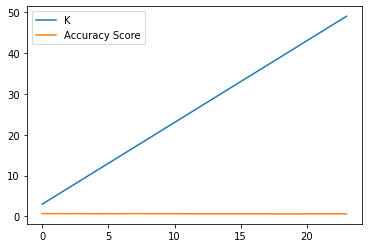

In [92]:
result.plot()
plt.show()

### Question 9c: kNN model 

What is the accuracy of the kNN model on the test set?

In [93]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accscore = accuracy_score(y_test,y_pred)
accscore

0.6966292134831461

### Question 10: Cross-validation 

In [94]:
df = pd.read_csv("titanicclean.csv")

In [95]:
df

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,0,3,22.00,7.25,1,0,2,2
1,1,1,1,38.00,71.28,1,0,2,0
2,1,1,3,26.00,7.92,0,0,1,2
3,1,1,1,35.00,53.10,1,0,2,2
4,0,0,3,35.00,8.05,0,0,1,2
...,...,...,...,...,...,...,...,...,...
884,0,0,2,27.00,13.00,0,0,1,2
885,1,1,1,19.00,30.00,0,0,1,2
886,0,1,3,28.00,23.45,1,2,4,2
887,1,0,1,26.00,30.00,0,0,1,0


In [96]:
X = df[['Sex','Pclass','Age',"Fare",'SibSp','Parch','FamilySize',"Embarked"]]
y = df["Survived"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=1)

Set the seed to 8 and train a new kNN model. Instead of the default training control, use 10-fold cross-validation where each partition consists of 10% of the total. Try tuning with k = seq(3, 51, 2)

In [98]:
random.seed(8)

knn_r_acc = []

for i in range(3,51,2):

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cvscore = cross_val_score(model,X,y,cv=10,verbose=1,scoring='accuracy')
    cv = cvscore.mean()
    knn_r_acc.append((i,cv))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [99]:
result = pd.DataFrame(knn_r_acc, columns=['K','Accuracy Score'])
result

,K,Accuracy Score
0,3,0.71
1,5,0.71
2,7,0.72
3,9,0.71
4,11,0.70
5,13,0.71
6,15,0.72
7,17,0.71
8,19,0.71
9,21,0.71


What is the optimal value of k using cross-validation?

What is the accuracy on the test set using the cross-validated kNN model?

In [100]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [101]:
model.score(X_train,y_train)

0.7791842475386779

In [102]:
model.score(X_test,y_test)

0.7078651685393258

### Question 11a: Classification tree model 

Set the seed to 10. Use caret to train a decision tree with the rpart method. Tune the complexity parameter with cp = seq(0, 0.05, 0.002).

In [103]:
random.seed(10)

treemodel = DecisionTreeClassifier(random_state=10)

In [104]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [105]:
treemodel.score(X_train,y_train)

0.9859353023909986

In [106]:
treemodel.score(X_test,y_test)

0.7808988764044944

### Question 11b: Classification tree model 

Inspect the final model and plot the decision tree.

In [107]:
fn = ['Sex','Pclass','Age','Fare','SibSp','Parch','FamilySize',"Embarked"]
cn = ['Survived']

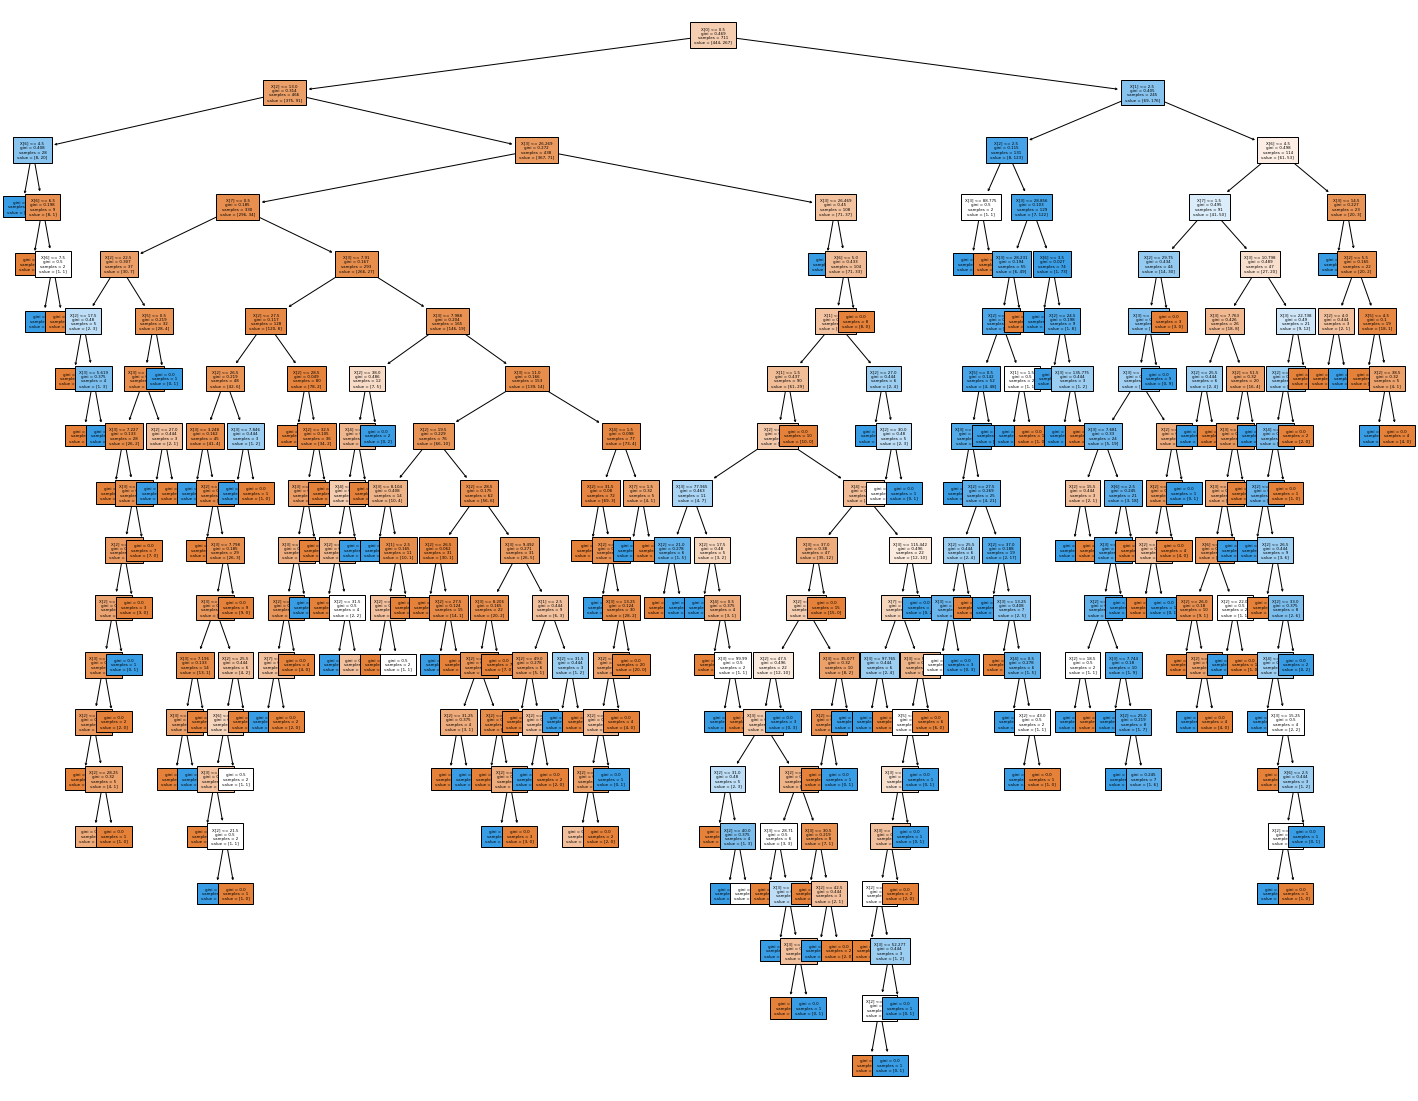

In [108]:
plt.figure(figsize=(25,20))
plot_tree(treemodel,filled=True, fontsize=4)
plt.show()

### Question 11c: Classification tree model 

Using the decision rules generated by the final model, predict whether the following individuals would survive.

### Question 12: Random forest model 

Set the seed to 14. Use the caret train() function with the rf method to train a random forest. Test values of mtry = seq(1:7). Set ntree to 100.

In [109]:
random.seed(14)

In [110]:
rf = RandomForestClassifier(random_state=14)

In [111]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=14)

In [112]:
rf.score(X_train,y_train)

0.9859353023909986

In [113]:
rf.score(X_test,y_test)

0.797752808988764

What mtry value maximizes accuracy?

What is the accuracy of the random forest model on the test set?

In [114]:
rf.feature_importances_

array([0.22896669, 0.08284057, 0.2634308 , 0.27303186, 0.03143651,
       0.02865156, 0.05505106, 0.03659094])

In [115]:
X.columns

Index(['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Embarked'], dtype='object')